In [0]:
import re
from pyspark.sql import Row
from pyspark.sql.functions import to_timestamp
from datetime import datetime as dt

In [0]:
pattern = '^(\S+) (\S+) (\S+) \[([\w:/]+\s[+\-]\d{4})\] "(.+?)" (\d{3}) (\d+) "([^"]*)" "([^"]*)" "([^"]*)"'

In [0]:
def parse_log(log):
    
    """Parses the log line and returns the underlying information"""
    
    match = re.search(pattern, log)
    if match is None:
        raise Exception(f"Invalid Log line {log}")
        
    method_len = len(match.group(5).split(' ')[0])
    timeStamp = str(dt.strptime(match.group(4), '%d/%b/%Y:%H:%M:%S %z'))
    
    return Row(
        ip_address = match.group(1),
        client_id = match.group(2),
        user_id = match.group(3),
        timestamp = timeStamp,
        method = match.group(5).split(' ')[0],
        endpoint = match.group(5)[method_len+1:][:-9],
        protocol = match.group(5)[-8:],
        response_code = int(match.group(6)),
        content_size = int(match.group(7)),
        referrer = match.group(8),
        browser_info = match.group(9)
    )

In [0]:
display(dbutils.fs.ls("/FileStore/tables"))

path,name,size,modificationTime
dbfs:/FileStore/tables/access3.log,access3.log,356712588,1662361934000


In [0]:
logFile = '/FileStore/tables/access3.log'
df_logs = spark.read.text(logFile)
df_logs.show(5)

+--------------------+
|               value|
+--------------------+
|79.127.70.118 - -...|
|79.127.70.118 - -...|
|79.127.70.118 - -...|
|79.127.70.118 - -...|
|79.127.70.118 - -...|
+--------------------+
only showing top 5 rows



In [0]:
rdd_logs = sc.textFile(logFile).map(parse_log)

In [0]:
df_logs = rdd_logs.toDF()

In [0]:
display(df_logs)

ip_address,client_id,user_id,timestamp,method,endpoint,protocol,response_code,content_size,referrer,browser_info
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/discountLabel/get/27?type=desktopSmallIcon,HTTP/1.1,200,10617,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/image/65272/productModel/150x150,HTTP/1.1,200,3014,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/image/1219/mainSlide,HTTP/1.1,200,87969,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/image/65269/productModel/150x150,HTTP/1.1,200,3734,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/image/64756/productModel/150x150,HTTP/1.1,200,3599,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/image/1221/mainSlide,HTTP/1.1,200,90490,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
5.119.248.225,-,-,2019-01-26 14:00:06+03:30,GET,/image/15379/productModel/150x150,HTTP/1.1,200,2817,https://www.zanbil.ir/m/product/10836/15663/%D8%A7%D8%AA%D9%88-%D9%85%D9%88-%D9%BE%D8%B1%D9%86%D8%B3%D9%84%DB%8C-%D9%85%D8%AF%D9%84-PR114AT,"Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1"
66.249.66.92,-,-,2019-01-26 14:00:06+03:30,GET,/static/css/font/wyekan/font.woff,HTTP/1.1,304,0,-,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
79.127.70.118,-,-,2019-01-26 14:00:06+03:30,GET,/image/64746/productModel/150x150,HTTP/1.1,200,3075,"https://www.zanbil.ir/filter/b1,p62","Mozilla/5.0 (Linux; Andr0id 7.0; BRAVIA 2015 Build/NRD91N.S20) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.59.E9103576.154"
5.112.77.219,-,-,2019-01-26 14:00:07+03:30,GET,/m/browse/tv/%D8%AA%D9%84%D9%88%DB%8C%D8%B2%DB%8C%D9%88%D9%86,HTTP/1.1,200,19419,https://www-zanbil-ir.cdn.ampproject.org/v/s/www.zanbil.ir/m?amp_js_v=0.1&usqp=mq331AQECAEoAQ%3D%3D,"Mozilla/5.0 (Linux; Android 8.0.0; ALP-L29) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"


In [0]:
df_logs = df_logs.withColumn('timestamp', to_timestamp(df_logs['timestamp'],'yyyy-MM-dd HH:mm:ssVV'))

In [0]:
df_logs.printSchema()

root
 |-- ip_address: string (nullable = true)
 |-- client_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- method: string (nullable = true)
 |-- endpoint: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- response_code: long (nullable = true)
 |-- content_size: long (nullable = true)
 |-- referrer: string (nullable = true)
 |-- browser_info: string (nullable = true)



In [0]:
df_logs.createOrReplaceTempView('logs')

In [0]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

/databricks/spark/python/pyspark/sql/context.py:82: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
#Top 10 Endpoints which Transfer Maximum Content
topEndpointsMaxSize = (sqlContext
                .sql("SELECT endpoint,content_size/1024 FROM logs ORDER BY content_size DESC LIMIT 10")
                .rdd.map(lambda row: (row[0], row[1]))
                .collect())
display(topEndpointsMaxSize)

_1,_2
/image/5801?name=er217%2C%2C%2C....png&wh=max,1100.3046875
/image/get?path=/Image/kara.png,980.25390625
/image/22766?name=df0f96e69....png&wh=max,928.9501953125
/image/5786?name=er1611k-web.png&wh=max,858.2578125
/image/5786?name=er1611k-web.png&wh=max,858.2578125
/image/22812?name=remington-pf7400-.png&wh=max,745.013671875
/image/get?path=/Image/%DA%A9%D8%A7%D8%A8%D9%84+3.png,709.19140625
/image/get?path=/Image/%DA%A9%D8%A7%D8%A8%D9%84+3.png,709.19140625
/image/get?path=/Image/%DA%A9%D8%A7%D8%A8%D9%84+3.png,709.029296875
/image/get?path=/Image/ARC-2000ASB_Acc.jpg,691.5107421875


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
def bar_plot_list_of_tuples_horizontal(input_list,x_label,y_label,plot_title):
    y_labels = [val[0] for val in input_list]
    x_labels = [val[1] for val in input_list]
    plt.figure(figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    ax = pd.Series(x_labels).plot(kind='barh')
    ax.set_yticklabels(y_labels)
    for i, v in enumerate(x_labels):
        ax.text(int(v) + 0.5, i - 0.25, str(v),ha='center', va='bottom')

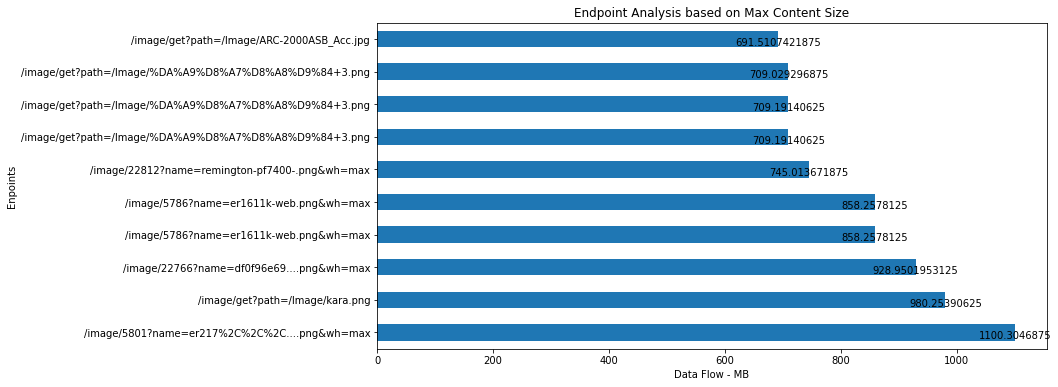

In [0]:
bar_plot_list_of_tuples_horizontal(topEndpointsMaxSize,'Data Flow - MB','Enpoints','Endpoint Analysis based on Max Content Size')

In [0]:
responseCodeToCount = (sqlContext
                       .sql("SELECT response_code, COUNT(*) AS theCount FROM logs GROUP BY response_code")
                       .rdd.map(lambda row: (row[0], row[1]))
                       .collect())

# Code to Plot the results
def bar_plot_list_of_tuples(input_list,x_label,y_label,plot_title):
    x_labels = [val[0] for val in input_list]
    y_labels = [val[1] for val in input_list]
    plt.figure(figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    ax = pd.Series(y_labels).plot(kind='bar')
    ax.set_xticklabels(x_labels)
    rects = ax.patches
    for rect, label in zip(rects, y_labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

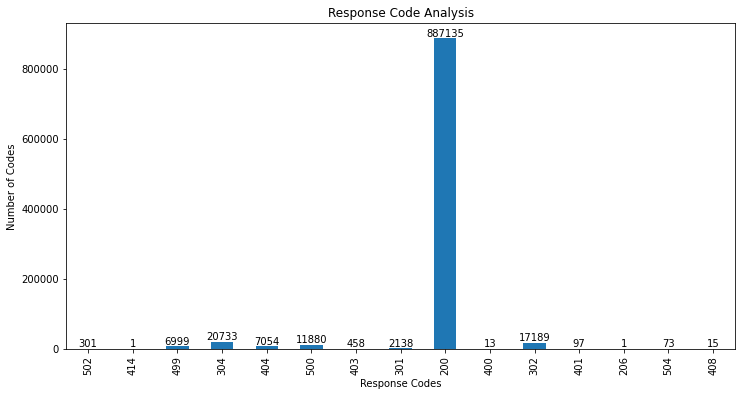

In [0]:
bar_plot_list_of_tuples(responseCodeToCount,'Response Codes','Number of Codes','Response Code Analysis')

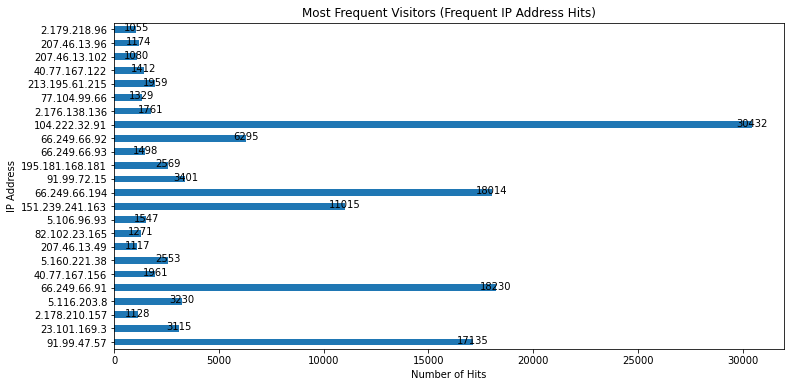

In [0]:
# Most Frequent Visitors (Most Frequent IP Address visits)
frequentIpAddressesHits = (sqlContext
               .sql("SELECT ip_address, COUNT(*) AS total FROM logs GROUP BY ip_address HAVING total > 1000")
               .rdd.map(lambda row: (row[0], row[1]))
               .collect())
bar_plot_list_of_tuples_horizontal(frequentIpAddressesHits,'Number of Hits','IP Address','Most Frequent Visitors (Frequent IP Address Hits)')

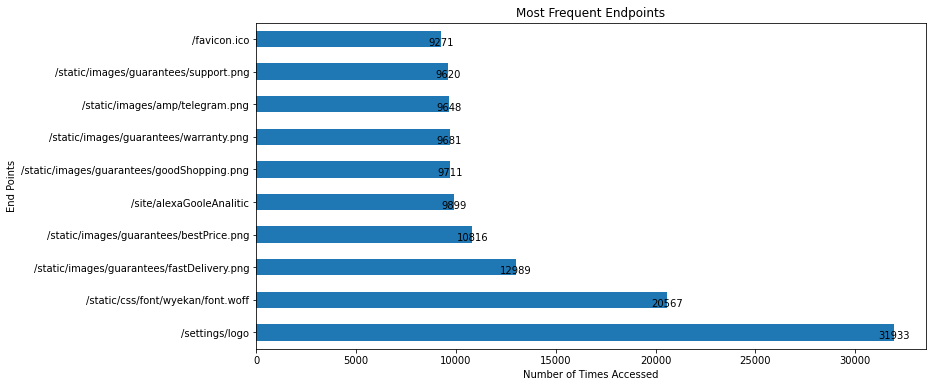

In [0]:
#Most frequent endpoints visited
topEndpoints = (sqlContext
                .sql("SELECT endpoint, COUNT(*) AS total FROM logs GROUP BY endpoint ORDER BY total DESC LIMIT 10")
                .rdd.map(lambda row: (row[0], row[1]))
                .collect())
bar_plot_list_of_tuples_horizontal(topEndpoints,'Number of Times Accessed','End Points','Most Frequent Endpoints')

In [0]:
# Any IP Address that has accessed the server more than 1000 times.
ipAddresses = (sqlContext
               .sql("SELECT ip_address, COUNT(*) AS total FROM logs GROUP BY ip_address HAVING total > 1000 LIMIT 25")
               .rdd.map(lambda row: row[0])
               .collect())
print ("All IPAddresses > 1000 times: %s" % ipAddresses)

All IPAddresses > 1000 times: ['91.99.47.57', '23.101.169.3', '2.178.210.157', '5.116.203.8', '66.249.66.91', '40.77.167.156', '5.160.221.38', '207.46.13.49', '82.102.23.165', '5.106.96.93', '151.239.241.163', '66.249.66.194', '91.99.72.15', '195.181.168.181', '66.249.66.93', '66.249.66.92', '104.222.32.91', '2.176.138.136', '77.104.99.66', '213.195.61.215', '40.77.167.122', '207.46.13.102', '207.46.13.96', '2.179.218.96']
